# Logistic Regression

## Dataset

Статистика по внебрачным романам
http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html

Собрана опросом среди читательниц журнала.

Данные содержат 6366 ответа по 9 параметрам:

* `rate_marriage`: оценка брака женщиной по 5-балльной шкале
* `age`: возраст
* `yrs_married`: лет в браке
* `children`: количество детей
* `religious`: религиозность по 4-балльной шкале
* `educ`: уровень образования (максимум – 20)
* `occupation`: род занятий
* `occupation_husb`: род занятий мужа
* `affairs`: время, затраченное на романы


## Импорты

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

## Подготовка данных


In [2]:
# load dataset
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


## Исследование данных

In [3]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [4]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


## Визуализация

In [5]:
%matplotlib inline

Let's start with histograms of education and marriage rating.

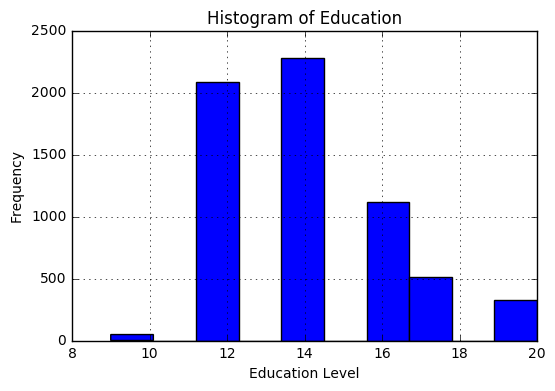

In [6]:
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

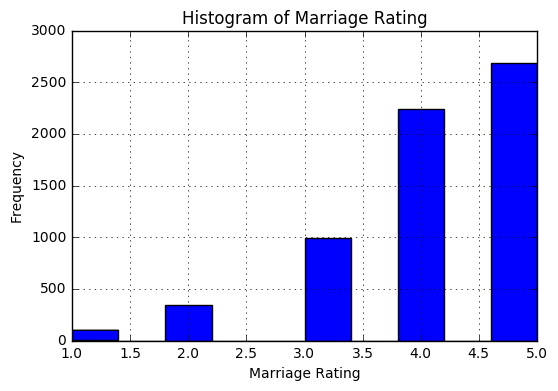

In [7]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

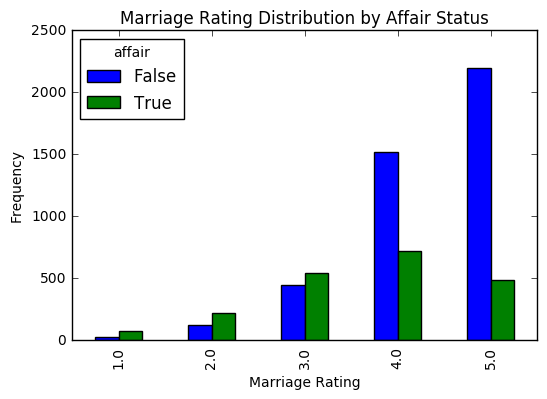

In [8]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

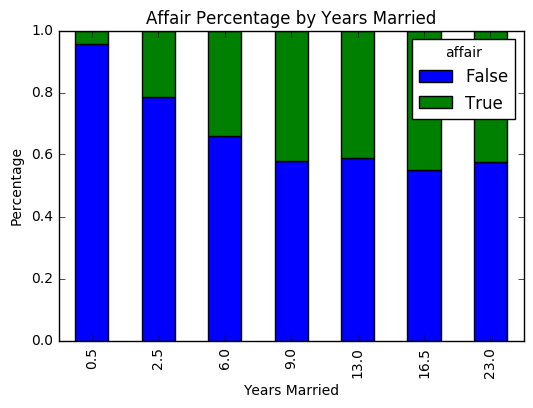

In [9]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

## Дополнительная обработка данных

In [10]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [11]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,27.0,9.0,0.0,2.0,14.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,22.0,2.5,0.0,2.0,12.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,6.0,0.0,1.0,16.0


In [12]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [14]:
# flatten y into a 1-D array
y = np.ravel(y)
y

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

## Logistic Regression

In [15]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.72588752748978946

In [16]:
# what percentage had affairs?
y.mean()

0.32249450204209867

In [18]:
model.coef_

array([[ 1.48983597,  0.18806653,  0.49894811,  0.25066854,  0.83900818,
         0.83390852,  0.19063586,  0.29783259,  0.16140877,  0.18777078,
         0.1940162 , -0.70312196, -0.05841791,  0.1056766 ,  0.01691949,
        -0.37113582,  0.00401625]])

In [20]:
np.transpose(model.coef_)

array([[ 1.48983597],
       [ 0.18806653],
       [ 0.49894811],
       [ 0.25066854],
       [ 0.83900818],
       [ 0.83390852],
       [ 0.19063586],
       [ 0.29783259],
       [ 0.16140877],
       [ 0.18777078],
       [ 0.1940162 ],
       [-0.70312196],
       [-0.05841791],
       [ 0.1056766 ],
       [ 0.01691949],
       [-0.37113582],
       [ 0.00401625]])

In [21]:
list(zip(X.columns, np.transpose(model.coef_)))

[('Intercept', array([ 1.48983597])),
 ('occ_2', array([ 0.18806653])),
 ('occ_3', array([ 0.49894811])),
 ('occ_4', array([ 0.25066854])),
 ('occ_5', array([ 0.83900818])),
 ('occ_6', array([ 0.83390852])),
 ('occ_husb_2', array([ 0.19063586])),
 ('occ_husb_3', array([ 0.29783259])),
 ('occ_husb_4', array([ 0.16140877])),
 ('occ_husb_5', array([ 0.18777078])),
 ('occ_husb_6', array([ 0.1940162])),
 ('rate_marriage', array([-0.70312196])),
 ('age', array([-0.05841791])),
 ('yrs_married', array([ 0.1056766])),
 ('children', array([ 0.01691949])),
 ('religious', array([-0.37113582])),
 ('educ', array([ 0.00401625]))]

In [22]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.48983596947]
1,occ_2,[0.188066529506]
2,occ_3,[0.498948106888]
3,occ_4,[0.250668538162]
4,occ_5,[0.839008182281]
5,occ_6,[0.833908524592]
6,occ_husb_2,[0.190635862523]
7,occ_husb_3,[0.29783259112]
8,occ_husb_4,[0.161408768431]
9,occ_husb_5,[0.187770784705]


## Прогноз вероятности

Например, 25-летняя женщина, учитель, закончила колледж, замужем 3 года, имеет 1 ребенка, очень религиозна, средне довольно браком, а ее муж бизнесмен.

In [23]:
# rate_marriage	age	yrs_married	children	religious	educ	occupation	occupation_husb	affairs	affair
model.predict_proba(np.array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 25, 3, 1, 4, 16]))

/Users/ashvets/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.77522204,  0.22477796]])